In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
variation in magnitude

In [4]:
scaler = StandardScaler()
scaler

StandardScaler()

In [5]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [6]:
df1 = pd.DataFrame(df_scaled,columns = df.columns)
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.614870e-17,1.001138,-0.690297,-0.690297,-0.690297,1.448652,1.448652
Region,440.0,3.552714e-16,1.001138,-1.995342,-0.702337,0.590668,0.590668,0.590668
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672
Delicassen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447


#### creating instance of Kmeans and fitting model

In [8]:
kmeans = KMeans(n_clusters=2,random_state=20)
kmeans

KMeans(n_clusters=2, random_state=20)

In [9]:
kmeans.fit(df1)

KMeans(n_clusters=2, random_state=20)

In [10]:
pred = kmeans.predict(df1)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [11]:
kmeans.inertia_

2599.38555935614

#### Elbow method to determine optimum no of cluster

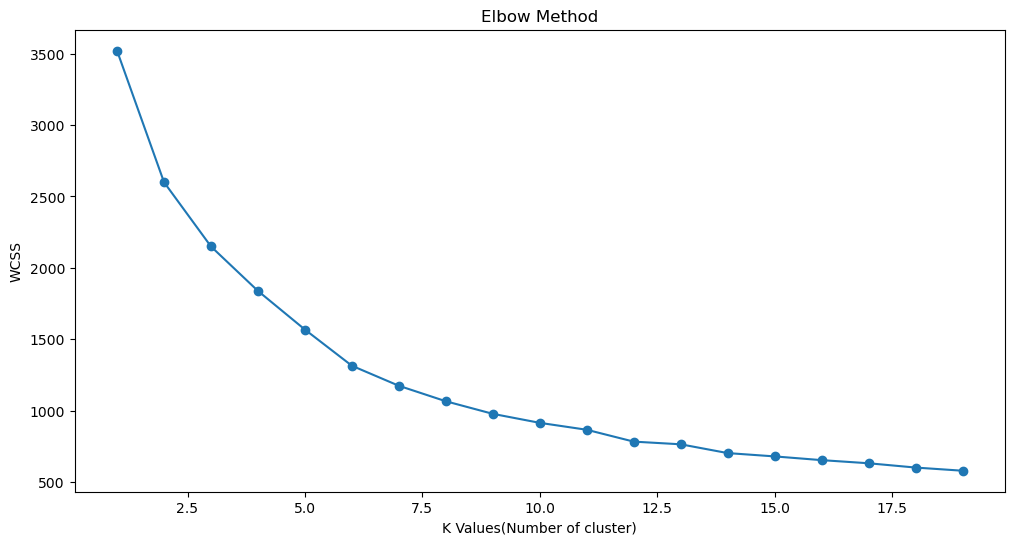

In [12]:
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,random_state=20)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
frame = pd.DataFrame({"k":range(1,20),"wcss":wcss})
plt.figure(figsize=(12,6))
plt.plot(frame["k"],frame["wcss"],marker = "o")
plt.xlabel("K Values(Number of cluster)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.savefig("elbow_method")

#### selecting number of cluster from graph

In [18]:
kmeans = KMeans(n_clusters=5,random_state=20)
kmeans.fit(df1)
pred = kmeans.predict(df1)
pred

array([4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0,
       0, 1, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 1, 0, 0, 4, 4,
       4, 4, 4, 3, 4, 4, 0, 0, 4, 4, 0, 0, 3, 4, 0, 0, 4, 3, 4, 4, 0, 3,
       0, 4, 0, 0, 0, 1, 0, 4, 4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 3, 3, 1,
       0, 0, 0, 0, 3, 1, 4, 0, 4, 0, 0, 0, 4, 4, 4, 1, 0, 0, 4, 4, 4, 4,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 1, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 2, 4, 4, 2, 4,

In [19]:
len(pred)

440

In [14]:
frame = pd.DataFrame(df1)
frame["K"]= pred
frame["K"].value_counts()

0    200
1    126
4     90
2     14
3     10
Name: K, dtype: int64